# Project: Introduction to DL-Problem statement

In this project, we analysis a water quality dataset from the Central Pollution Control Board (CPCB). we will use this dataset to predict water quality.

Access to clean water is a fundamental necessity, yet water quality can vary significantly based on environmental, geographical, and human factors. The dataset includes water quality monitoring data from across India, with chemical and physical parameters measured at various locations over different years (2019, 2020, 2021, 2022).

The dataset contains the following columns:

Well_ID, State, District, Block, Village: Geographical identifiers of water sampling locations.

Latitude, Longitude: Spatial coordinates for precise mapping.

Year: The year in which the sample was recorded.

Water Quality Indicators: pH, Electrical Conductivity (EC), Carbonates (CO3), Bicarbonates (HCO3), Chlorides (Cl), Sulfates (SO4), Nitrates (NO3), Total Hardness (TH), Calcium (Ca), Magnesium (Mg), Sodium (Na), Potassium (K), Fluoride (F), Total Dissolved Solids (TDS).

# Target Variables:
1) Water Quality Index (WQI): A numerical representation of overall water quality derived from chemical and physical parameters.

2) Water Quality Classification: A categorical label indicating the quality of water (e.g., Good, Poor, Unsuitable for Drinking).

In this project, our task is to build Deep Learning Neural Networks to predict the following:
Water Quality Index (WQI)
Water Quality Classification

we can download the dataset from the attachment provided and build the models using that.

# Step 1:- import basic library for data preprocessing and data analysis and also import dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('water_quality.csv')

In [5]:
#let's check basic information about our dataset
data.head()

,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Well_ID                       15244 non-null  object 
 1   State                         19029 non-null  object 
 2   District                      19029 non-null  object 
 3   Block                         17910 non-null  object 
 4   Village                       19028 non-null  object 
 5   Latitude                      18640 non-null  float64
 6   Longitude                     18639 non-null  float64
 7   Year                          19029 non-null  int64  
 8   pH                            19029 non-null  float64
 9   EC                            19029 non-null  float64
 10  CO3                           19029 non-null  float64
 11  HCO3                          19029 non-null  float64
 12  Cl                            19029 non-null  float64
 13  S

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Latitude,18640.0,150.904931,15292.040585,0.000000,19.98330,24.178415,75.71110,2.087833e+06
Longitude,18639.0,4021.431802,540151.202121,0.000000,25.22500,76.175000,79.53710,7.374400e+07
Year,19029.0,2020.286195,1.314794,2019.000000,2019.00000,2020.000000,2022.00000,2.022000e+03
pH,19029.0,7.713495,0.491413,2.800000,7.45000,7.720000,8.00000,1.092000e+01
EC,19029.0,1191.620744,1348.094278,2.290000,524.00000,860.000000,1390.00000,2.652000e+04
CO3,19029.0,3.326689,15.496995,0.000000,0.00000,0.000000,0.00000,3.680000e+02
HCO3,19029.0,296.774490,180.861685,0.000000,177.00000,281.000000,390.40000,3.112000e+03
Cl,19029.0,171.843482,349.922000,0.000000,32.00000,78.000000,175.00000,9.217000e+03
SO4,19029.0,68.087940,148.853626,0.000000,13.00000,30.790000,69.00000,7.601000e+03
NO3,19029.0,35.114294,55.488528,0.000000,4.46000,18.000000,43.00000,1.534900e+03


# Step 2 :- Data cleaning :- handle the null values 

In [8]:
# list of column who have null values :- 
data.isnull().sum()

Well_ID                         3785
State                              0
District                           0
Block                           1119
Village                            1
Latitude                         389
Longitude                        390
Year                               0
pH                                 0
EC                                 0
CO3                                0
HCO3                               0
Cl                                 0
SO4                                0
NO3                                0
TH                                 0
Ca                                 0
Mg                                 0
Na                                 0
K                                  0
F                                  0
TDS                                0
WQI                                0
Water Quality Classification       0
dtype: int64

In [9]:
# One thing we can observe then well_ID is not nessasary to predict our target ,so we drop it.
data.drop('Well_ID',inplace=True,axis=1)

In [10]:
# let's 1stly work on block :-
data['Block'].nunique()

5055

Because of categorical column and have so much unique values and only 1 row containing null values ,so we 2 options :- a)replace null by 'NA' b)we can drop it ,it will never impact our model so much.

In [11]:
data.fillna({'Block':'NA'},inplace=True)
data.isnull().sum()

State                             0
District                          0
Block                             0
Village                           1
Latitude                        389
Longitude                       390
Year                              0
pH                                0
EC                                0
CO3                               0
HCO3                              0
Cl                                0
SO4                               0
NO3                               0
TH                                0
Ca                                0
Mg                                0
Na                                0
K                                 0
F                                 0
TDS                               0
WQI                               0
Water Quality Classification      0
dtype: int64

In [12]:
# Let's work on village ;- 
data['Village'].nunique()

11210

In [13]:
# We can take similar action as taken in block case.
data.fillna({'Village':'NA'},inplace=True)
data.isnull().sum()

State                             0
District                          0
Block                             0
Village                           0
Latitude                        389
Longitude                       390
Year                              0
pH                                0
EC                                0
CO3                               0
HCO3                              0
Cl                                0
SO4                               0
NO3                               0
TH                                0
Ca                                0
Mg                                0
Na                                0
K                                 0
F                                 0
TDS                               0
WQI                               0
Water Quality Classification      0
dtype: int64

Let's handle longitude and latitude null value
we can fill the these values by taking the median of those rows who have same state and distict values.
# Note :-
we will fill these values from training data set after spliting, because to avoid data leaking.

# Step 3 :- Data visuaization 
let's see the spreading of data and the co-relation between them and distribution of target variables and so on.

(0.0, 3000.0)

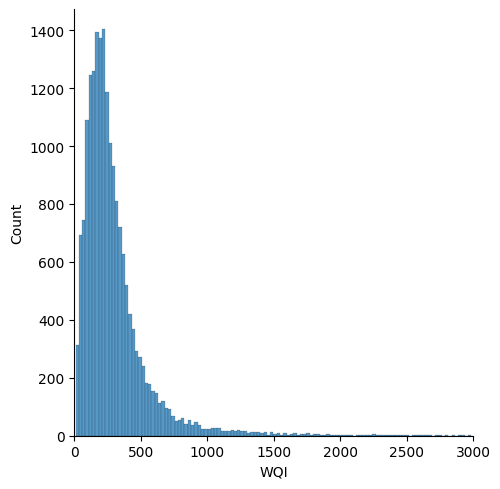

In [14]:
# Let's see distribution of our target variabes :-
sns.displot(data,x='WQI')
plt.xlim(0,3000)

so we can see , to predict WQI , is a regression problem .

<Figure size 1200x60000 with 0 Axes>

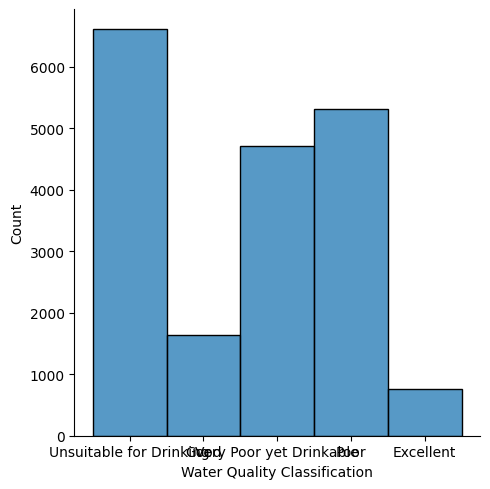

<Figure size 1200x60000 with 0 Axes>

In [15]:
sns.displot(data,x='Water Quality Classification')
plt.figure(figsize=(12,600))

In [16]:
data['Water Quality Classification'].unique()

array(['Unsuitable for Drinking', 'Good', 'Very Poor yet Drinkable',
       'Poor', 'Excellent'], dtype=object)

In [17]:
data.groupby('Water Quality Classification')['Water Quality Classification'].count()

Water Quality Classification
Excellent                   763
Good                       1632
Poor                       5317
Unsuitable for Drinking    6608
Very Poor yet Drinkable    4709
Name: Water Quality Classification, dtype: int64

In [18]:
#Let's see the co-relation between the columns 
data.corr(numeric_only=True)['WQI']

Latitude    -0.004263
Longitude   -0.003164
Year        -0.023797
pH           0.012890
EC           0.981442
CO3          0.096421
HCO3         0.493898
Cl           0.932176
SO4          0.705896
NO3          0.380014
TH           0.822221
Ca           0.624723
Mg           0.776863
Na           0.903628
K            0.274142
F            0.092698
TDS          0.924358
WQI          1.000000
Name: WQI, dtype: float64

<Axes: >

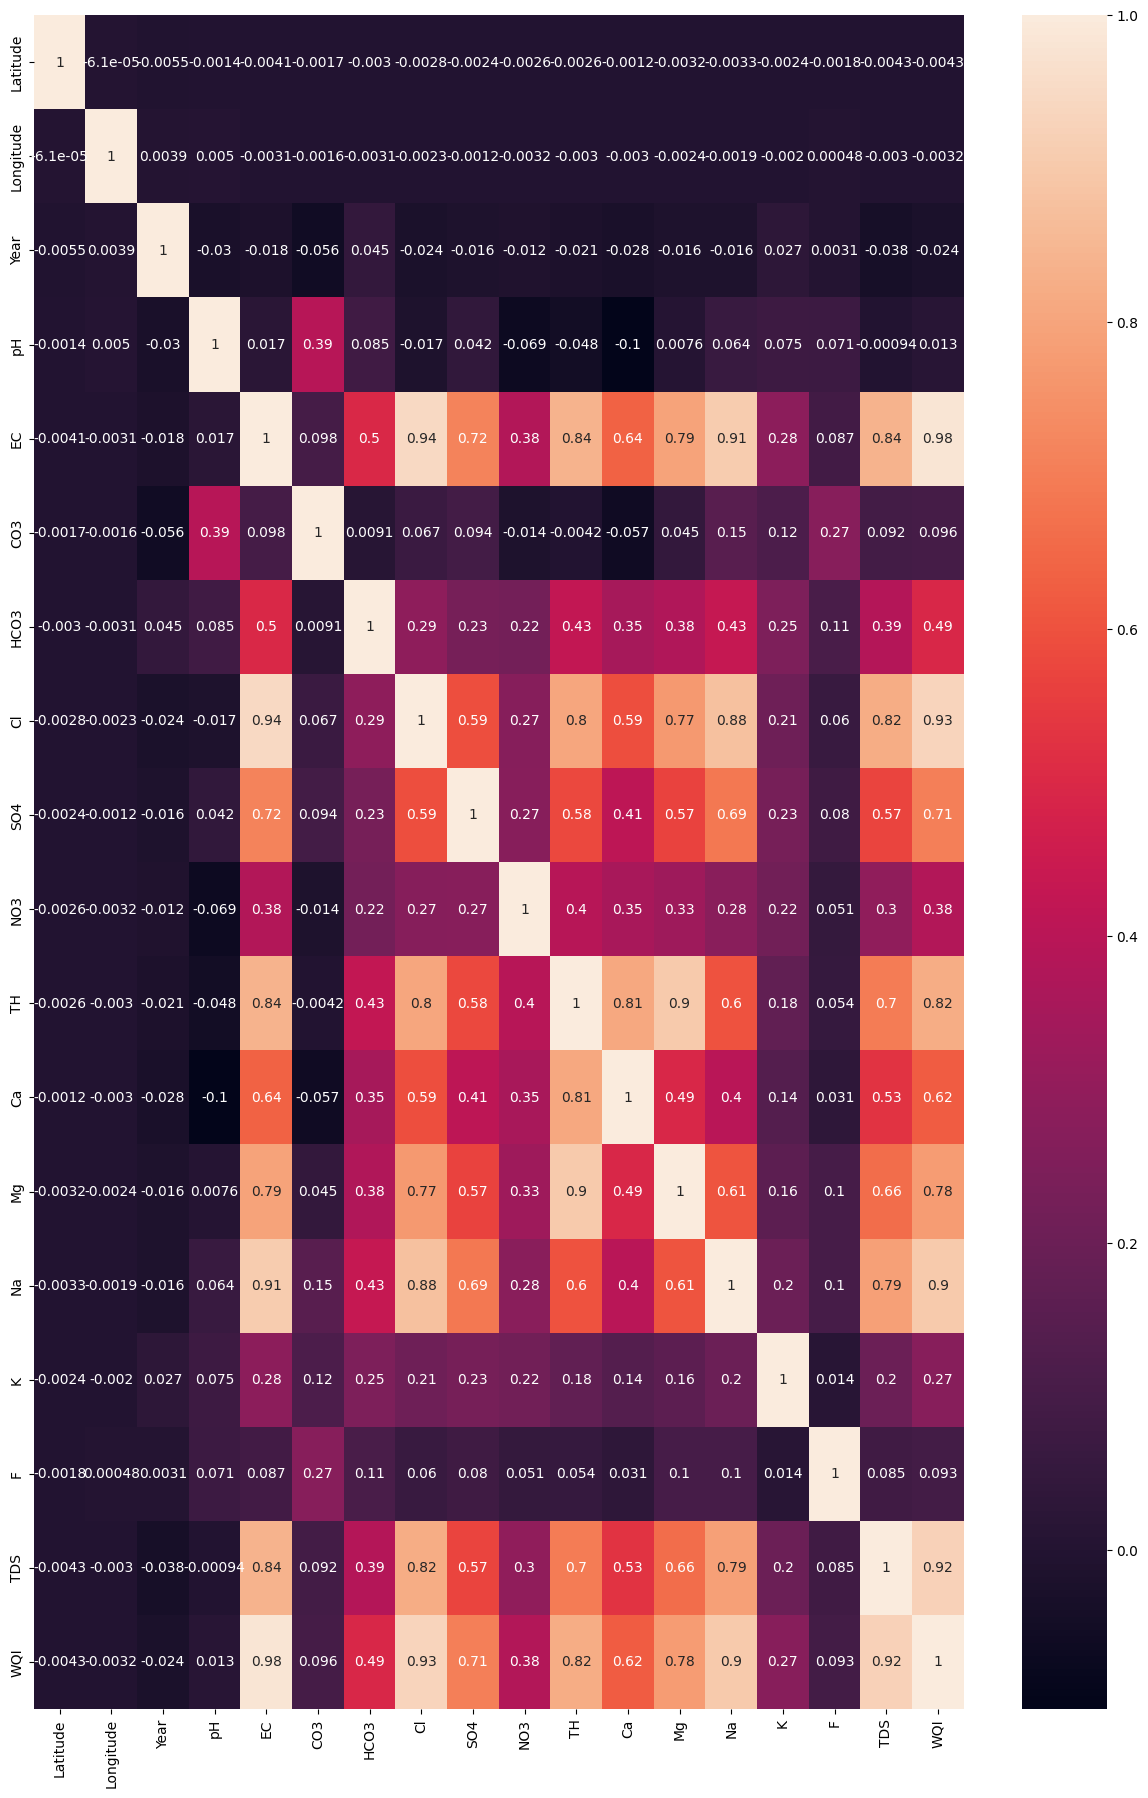

In [19]:
plt.figure(figsize=(15,22))
sns.heatmap(data.corr(numeric_only=True),annot=True)


# Note :- 
We can observe that there is many columns are highly co-related , if we also all columns then our model will be overfitted , to avoid that we can drop the one of column between highly co-related columns pair.

# Step 4 :- applying feature engineering

In [20]:
#Let's list out highly co-related column pairs 
thresold =0.8
corr_matrix=data.corr(numeric_only=True)
highly_corr_pairs=[(col1,col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if (col1 != col2) and abs(corr_matrix.loc[col1,col2] > thresold)]
print(highly_corr_pairs)

[('EC', 'Cl'), ('EC', 'TH'), ('EC', 'Na'), ('EC', 'TDS'), ('EC', 'WQI'), ('Cl', 'EC'), ('Cl', 'TH'), ('Cl', 'Na'), ('Cl', 'TDS'), ('Cl', 'WQI'), ('TH', 'EC'), ('TH', 'Cl'), ('TH', 'Ca'), ('TH', 'Mg'), ('TH', 'WQI'), ('Ca', 'TH'), ('Mg', 'TH'), ('Na', 'EC'), ('Na', 'Cl'), ('Na', 'WQI'), ('TDS', 'EC'), ('TDS', 'Cl'), ('TDS', 'WQI'), ('WQI', 'EC'), ('WQI', 'Cl'), ('WQI', 'TH'), ('WQI', 'Na'), ('WQI', 'TDS')]


In [21]:
col_to_drop=set()
for col1,col2 in highly_corr_pairs:
    if (col1 !='WQI') and (col2 !='WOI'):
        if corr_matrix.loc['WQI',col1] >= corr_matrix.loc['WQI',col2]:
            col_to_drop.add(col2)
        else :
            col_to_drop.add(col1)

filter_data=data.drop(columns=col_to_drop)

In [22]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         19029 non-null  object 
 1   District                      19029 non-null  object 
 2   Block                         19029 non-null  object 
 3   Village                       19029 non-null  object 
 4   Latitude                      18640 non-null  float64
 5   Longitude                     18639 non-null  float64
 6   Year                          19029 non-null  int64  
 7   pH                            19029 non-null  float64
 8   CO3                           19029 non-null  float64
 9   HCO3                          19029 non-null  float64
 10  SO4                           19029 non-null  float64
 11  NO3                           19029 non-null  float64
 12  K                             19029 non-null  float64
 13  F

Now we have only 16 columns from 24.

# Step 5:- Data Preprocessing 
it's include to handle data format , spliting of data and preparing train and test set.

In [23]:
obj_col=data.select_dtypes(include='O').columns
print(obj_col)

Index(['State', 'District', 'Block', 'Village',
       'Water Quality Classification'],
      dtype='object')


In [24]:
# let's check their unique values :-
for col in obj_col:
    print(f'{col} : {data[col].nunique()}')

State : 14
District : 600
Block : 5056
Village : 11211
Water Quality Classification : 5


As we can see here top 4 column have so much unique value and we already have longitude and latitude values so don't neet these values also, so we can drop these columns but after fill null values of train test set.

For Water Quality Classification , it have natural ordered hierarical order of water quality so we can use OrdinalEncoder to handle it.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
data['Water Quality Classification'].unique()

array(['Unsuitable for Drinking', 'Good', 'Very Poor yet Drinkable',
       'Poor', 'Excellent'], dtype=object)

In [27]:
encoder=OrdinalEncoder(categories=[['Unsuitable for Drinking', 'Very Poor yet Drinkable', 'Poor', 'Good', 'Excellent']]) #must be in ordered way

In [28]:
filter_data['Water Quality Classification']=encoder.fit_transform(filter_data[['Water Quality Classification']])

In [29]:
filter_data['Water Quality Classification']

0        0.0
1        3.0
2        1.0
3        2.0
4        3.0
        ... 
19024    0.0
19025    2.0
19026    0.0
19027    2.0
19028    1.0
Name: Water Quality Classification, Length: 19029, dtype: float64

In [30]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         19029 non-null  object 
 1   District                      19029 non-null  object 
 2   Block                         19029 non-null  object 
 3   Village                       19029 non-null  object 
 4   Latitude                      18640 non-null  float64
 5   Longitude                     18639 non-null  float64
 6   Year                          19029 non-null  int64  
 7   pH                            19029 non-null  float64
 8   CO3                           19029 non-null  float64
 9   HCO3                          19029 non-null  float64
 10  SO4                           19029 non-null  float64
 11  NO3                           19029 non-null  float64
 12  K                             19029 non-null  float64
 13  F

In [31]:
#Let 's prepare X and Y data set.
X=filter_data.drop(['WQI','Water Quality Classification'],axis=1)
Y1=filter_data['WQI']
Y2=filter_data['Water Quality Classification']

In [32]:
#Let's split dataset 
from sklearn.model_selection import train_test_split 

In [33]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

__Let's handle null data in longitude and latitude columns.__
we take median of these columns according to state distict and village information by train set and then fill it.

In [34]:
lat_median=X_train.groupby(by=['State','District','Block'])['Latitude'].median()
lat_median

State           District        Block     
Andhra Pradesh  ANANTAPUR       ANANTAPUR     77.504000
                                ATMAKUR       77.365556
                                Agali         77.023600
                                Amadagur      78.015653
                                Amarapuram    76.977800
                                                ...    
West Bengal     Uttar Dinajpur  Islampur      88.132400
                                Itahar        56.837050
                                Kaliaganj     88.250000
                                Karandighi    56.859850
                                Raiganj       25.707900
Name: Latitude, Length: 5307, dtype: float64

In [35]:
X_train['Latitude']=X_train['Latitude'].fillna(X_train.groupby(['State','District','Block'])['Latitude'].transform('median'))
X_train['Latitude'].isnull().sum()

np.int64(163)

In [36]:
X_train['Latitude']=X_train['Latitude'].fillna(X_train.groupby(['State','District'])['Latitude'].transform('median'))
X_train['Latitude'].isnull().sum()

np.int64(77)

In [37]:
X_train['Latitude']=X_train['Latitude'].fillna(X_train.groupby(['State'])['Latitude'].transform('median'))
X_train['Latitude'].isnull().sum()

np.int64(0)

In [38]:
X_train['Longitude']=X_train['Longitude'].fillna(X_train.groupby(['State','District','Block'])['Longitude'].transform('median'))
X_train['Longitude'].isnull().sum()

np.int64(163)

In [39]:
X_train['Longitude']=X_train['Longitude'].fillna(X_train.groupby(['State','District'])['Longitude'].transform('median'))
X_train['Longitude'].isnull().sum()

np.int64(77)

In [40]:
X_train['Longitude']=X_train['Longitude'].fillna(X_train.groupby(['State'])['Longitude'].transform('median'))
X_train['Longitude'].isnull().sum()

np.int64(0)

X_train is completed , similarly do with other set X_test .

In [41]:
X_test['Latitude']=X_test['Latitude'].fillna(X_train.groupby(['State','District','Block'])['Latitude'].transform('median'))
X_test['Latitude'].isnull().sum()

np.int64(71)

In [42]:
X_test['Latitude']=X_test['Latitude'].fillna(X_test.groupby(['State','District'])['Latitude'].transform('median'))
X_test['Latitude'].isnull().sum()

np.int64(9)

In [43]:
X_test['Latitude']=X_test['Latitude'].fillna(X_test.groupby(['State'])['Latitude'].transform('median'))
X_test['Latitude'].isnull().sum()

np.int64(0)

In [44]:
X_test['Longitude']=X_test['Longitude'].fillna(X_test.groupby(['State','District','Block'])['Longitude'].transform('median'))
X_test['Longitude'].isnull().sum()

np.int64(47)

In [45]:
X_test['Longitude']=X_test['Longitude'].fillna(X_test.groupby(['State','District'])['Longitude'].transform('median'))
X_test['Longitude'].isnull().sum()

np.int64(9)

In [46]:
X_test['Longitude']=X_test['Longitude'].fillna(X_test.groupby(['State'])['Longitude'].transform('median'))
X_test['Longitude'].isnull().sum()

np.int64(0)

__Let's delete the un-needed column of categories__

In [47]:
X_train.drop(['State','District','Block','Village'],inplace=True,axis=1)
X_test.drop(['State','District','Block','Village'],inplace=True,axis=1)


In [48]:
X_test.isnull().sum()

Latitude     0
Longitude    0
Year         0
pH           0
CO3          0
HCO3         0
SO4          0
NO3          0
K            0
F            0
dtype: int64

# Step 6 :- Apply Normalization and conversion in tensor values.

In [49]:
from sklearn.preprocessing import MinMaxScaler
import torch

ModuleNotFoundError: No module named 'torch'

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train_values=scaler.fit_transform(X_train)
type(X_train_values)

numpy.ndarray

In [ ]:
X_test_values=scaler.transform(X_test)

In [ ]:
# feature data already converted in numpy array , we need to convert Label data
Y1_test=Y1_test.values
Y1_train=Y1_train.values
Y2_train=Y2_train.values
Y2_test=Y2_test.values

In [ ]:
X_train_tensor=torch.tensor(X_train_values,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test_values,dtype=torch.float32)
Y1_train_tensor=torch.tensor(Y1_train,dtype=torch.float32)
Y1_test_tensor=torch.tensor(Y1_test,dtype=torch.float32)
Y2_train_tensor=torch.tensor(Y2_train,dtype=torch.float32)
Y2_test_tensor=torch.tensor(Y2_test,dtype=torch.float32)

# Step 7 :- Building the Neural Network , Dataset and Tensor data loader

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader,Dataset


__1)Let's create a custom dataset function__

In [ ]:
class preparingDataset(Dataset):
    def __init__(self,features,class_lables,reg_labels):
        self.features=features
        self.class_lables=class_lables
        self.reg_labels=reg_labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self,index):
        return self.features[index],(self.class_lables[index],self.reg_labels[index])

__2)Let's create out model class__

In [ ]:
#For MultiClassification model 
class MultiModel(nn.Module):
    def __init__(self,input_num,output_num):
        super(MultiModel,self).__init__()
        self.l1=nn.Linear(input_num,256)
        self.n1=nn.BatchNorm1d(256)
        self.d1=nn.Dropout(0.5)

        self.l2=nn.Linear(256,128)
        self.n2=nn.BatchNorm1d(128)
        self.d2=nn.Dropout(0.5)

        self.l3=nn.Linear(128,64)
        self.n3=nn.BatchNorm1d(64)
        self.d3=nn.Dropout(0.5)

        self.l4=nn.Linear(64,output_num) # For multi classification, output_num= 5 multi classes.for regression outpout_num=1

    def forward(self,x):
        x=F.leaky_relu(self.n1(self.l1(x)),negative_slope=0.01)
        x=self.d1(x)
        x=F.leaky_relu(self.n2(self.l2(x)),negative_slope=0.01)
        x=self.d2(x)
        x=F.leaky_relu(self.n3(self.l3(x)),negative_slope=0.01)
        x=self.d3(x)
       # x=F.softmax(self.l4(x)) we can't use softmax function because our loss function will apply softmax function internally
        x=self.l4(x)
        return x

__3)Let's create training and evalution fun__

In [ ]:
from sklearn.metrics import r2_score,accuracy_score,f1_score,mean_absolute_error

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def train_and_evaluate(
    model_clas,
    model_reg,
    train_loader,
    val_loader,
    optimizer_clas,
    optimizer_reg,
    num_epochs,
    patience=5,  # Early stopping patience
    class_criterion=nn.CrossEntropyLoss(),
    reg_criterion=nn.MSELoss()
):
    best_val_loss_clas = float('inf')
    best_val_loss_reg = float('inf')
    patience_counter_clas = 0
    patience_counter_reg = 0
    best_model_clas = None
    best_model_reg = None

    train_loss_clas_list = []
    train_loss_reg_list = []
    val_loss_clas_list = []
    val_loss_reg_list = []

    for epoch in range(num_epochs):
        # Training phase
        model_clas.train()
        model_reg.train()
        
        train_class_loss = 0.0
        train_reg_loss = 0.0
        num_train_batches = 0

        for inputs, (class_labels, reg_labels) in train_loader:
            # Classification Model
            optimizer_clas.zero_grad()
            class_pred = model_clas(inputs)
            class_labels = class_labels.long()  # Convert to torch.LongTensor , cross entropy need labels in long type tensor
            loss_class = class_criterion(class_pred, class_labels)
            loss_class.backward()
            optimizer_clas.step()
            train_class_loss += loss_class.item()

            # Regression Model
            optimizer_reg.zero_grad()
            reg_pred = model_reg(inputs)
            loss_reg = reg_criterion(reg_pred.squeeze(), reg_labels)
            loss_reg.backward()
            optimizer_reg.step()
            train_reg_loss += loss_reg.item()

            num_train_batches += 1

        avg_train_loss_clas = train_class_loss / num_train_batches
        avg_train_loss_reg = train_reg_loss / num_train_batches
        train_loss_clas_list.append(avg_train_loss_clas)
        train_loss_reg_list.append(avg_train_loss_reg)

        # Validation phase
        model_clas.eval()
        model_reg.eval()

        val_class_loss = 0.0
        val_reg_loss = 0.0
        num_val_batches = 0

        class_preds = []
        class_targets = []
        reg_preds = []
        reg_targets = []

        with torch.no_grad():
            for inputs, (class_labels, reg_labels) in val_loader:
                # Classification Model
                class_pred = model_clas(inputs)
                class_labels = class_labels.long()  # Convert to torch.LongTensor
                loss_class = class_criterion(class_pred, class_labels)
                val_class_loss += loss_class.item()
                class_preds.extend(torch.argmax(class_pred, dim=1).cpu().numpy())
                class_targets.extend(class_labels.cpu().numpy())

                # Regression Model
                reg_pred = model_reg(inputs)
                loss_reg = reg_criterion(reg_pred.squeeze(), reg_labels)
                val_reg_loss += loss_reg.item()
                reg_preds.extend(reg_pred.squeeze().cpu().numpy())
                reg_targets.extend(reg_labels.cpu().numpy())

                num_val_batches += 1

        avg_val_loss_clas = val_class_loss / num_val_batches
        avg_val_loss_reg = val_reg_loss / num_val_batches
        val_loss_clas_list.append(avg_val_loss_clas)
        val_loss_reg_list.append(avg_val_loss_reg)

        # Metrics
        val_accuracy = accuracy_score(class_targets, class_preds)
        val_f1 = f1_score(class_targets, class_preds, average='weighted')
        val_mae = mean_absolute_error(reg_targets, reg_preds)
        val_r2 = r2_score(reg_targets, reg_preds)

        print(
            f"Epoch {epoch+1}: "
            f"Train Loss (Clas): {avg_train_loss_clas:.4f}, Train Loss (Reg): {avg_train_loss_reg:.4f}, "
            f"Val Loss (Clas): {avg_val_loss_clas:.4f}, Val Loss (Reg): {avg_val_loss_reg:.4f}, "
            f"Val Accuracy: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, "
            f"Val MAE: {val_mae:.4f}, Val R²: {val_r2:.4f}"
        )

        # Early Stopping for Classification Model
        if avg_val_loss_clas < best_val_loss_clas:
            best_val_loss_clas = avg_val_loss_clas
            patience_counter_clas = 0
            best_model_clas = model_clas.state_dict()
        else:
            patience_counter_clas += 1
            if patience_counter_clas >= patience:
                print("Early stopping triggered for classification model!")
                model_clas.load_state_dict(best_model_clas)

        # Early Stopping for Regression Model
        if avg_val_loss_reg < best_val_loss_reg:
            best_val_loss_reg = avg_val_loss_reg
            patience_counter_reg = 0
            best_model_reg = model_reg.state_dict()
        else:
            patience_counter_reg += 1
            if patience_counter_reg >= patience:
                print("Early stopping triggered for regression model!")
                model_reg.load_state_dict(best_model_reg)

    # Plot Train and Validation Loss for Classification
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss_clas_list, label='Train Loss (Classification)')
    plt.plot(val_loss_clas_list, label='Validation Loss (Classification)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss (Classification)')
    plt.legend()
    plt.show()

    # Plot Train and Validation Loss for Regression
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss_reg_list, label='Train Loss (Regression)')
    plt.plot(val_loss_reg_list, label='Validation Loss (Regression)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss (Regression)')
    plt.legend()
    plt.show()

    return model_clas, model_reg


# Step 8:- finally train and evaluate our model

Epoch 1: Train Loss (Clas): 1.2551, Train Loss (Reg): 188659.0714, Val Loss (Clas): 0.9700, Val Loss (Reg): 196396.7930, Val Accuracy: 0.5917, Val F1: 0.5595, Val MAE: 307.0291, Val R²: -0.8718
Epoch 2: Train Loss (Clas): 0.9750, Train Loss (Reg): 182569.4672, Val Loss (Clas): 0.8363, Val Loss (Reg): 188807.4833, Val Accuracy: 0.6350, Val F1: 0.6254, Val MAE: 300.4358, Val R²: -0.7890
Epoch 3: Train Loss (Clas): 0.8971, Train Loss (Reg): 172933.7272, Val Loss (Clas): 0.7924, Val Loss (Reg): 178946.0398, Val Accuracy: 0.6710, Val F1: 0.6699, Val MAE: 292.2274, Val R²: -0.6887
Epoch 4: Train Loss (Clas): 0.8437, Train Loss (Reg): 159344.9934, Val Loss (Clas): 0.7580, Val Loss (Reg): 166804.7878, Val Accuracy: 0.6750, Val F1: 0.6654, Val MAE: 284.6198, Val R²: -0.5868
Epoch 5: Train Loss (Clas): 0.8266, Train Loss (Reg): 143651.5205, Val Loss (Clas): 0.7362, Val Loss (Reg): 147159.2758, Val Accuracy: 0.6968, Val F1: 0.6964, Val MAE: 262.0390, Val R²: -0.3843
Epoch 6: Train Loss (Clas): 0.

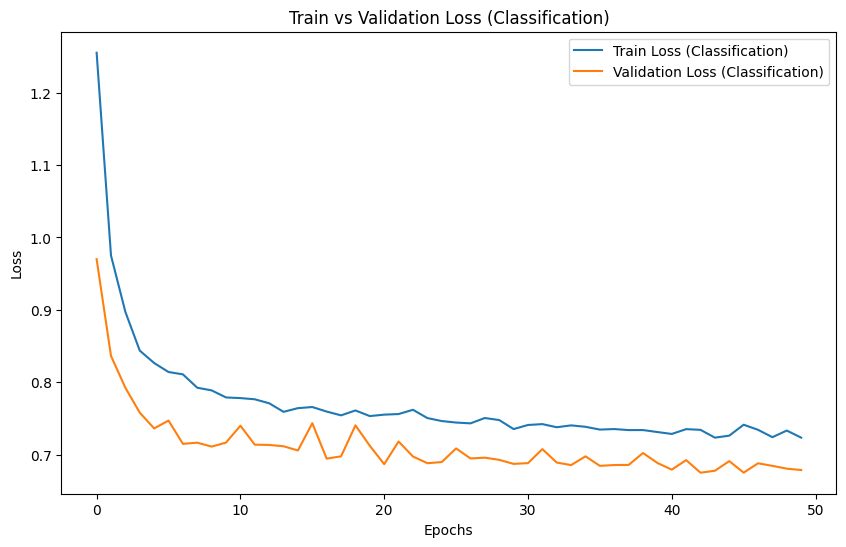

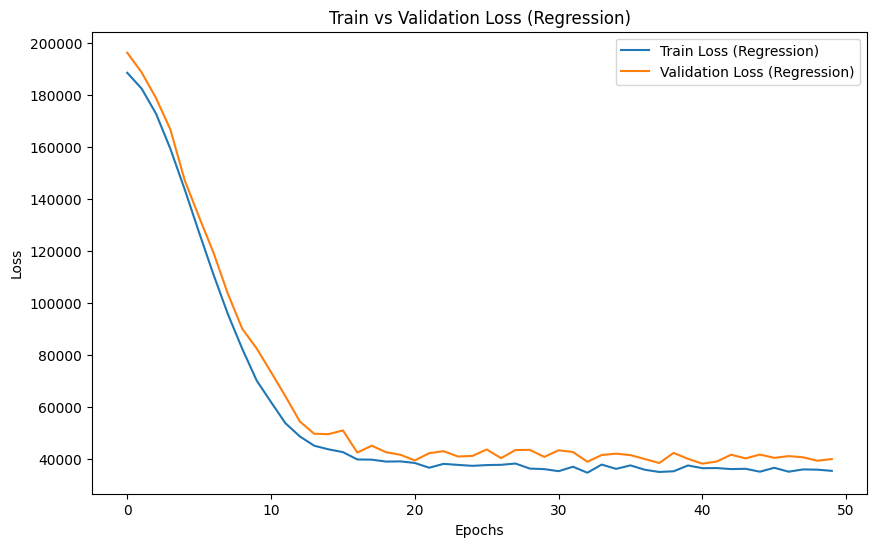

(MultiModel(
   (l1): Linear(in_features=10, out_features=256, bias=True)
   (n1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d1): Dropout(p=0.5, inplace=False)
   (l2): Linear(in_features=256, out_features=128, bias=True)
   (n2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d2): Dropout(p=0.5, inplace=False)
   (l3): Linear(in_features=128, out_features=64, bias=True)
   (n3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d3): Dropout(p=0.5, inplace=False)
   (l4): Linear(in_features=64, out_features=5, bias=True)
 ),
 MultiModel(
   (l1): Linear(in_features=10, out_features=256, bias=True)
   (n1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d1): Dropout(p=0.5, inplace=False)
   (l2): Linear(in_features=256, out_features=128, bias=True)
   (n2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
model_clas = MultiModel(X_train.shape[1],5)  # Define your classification model
model_reg = MultiModel(X_train.shape[1],1)  # Define your regression model
optimizer_clas = torch.optim.Adam(model_clas.parameters(), lr=0.001)
optimizer_reg = torch.optim.Adam(model_reg.parameters(), lr=0.001)
train_loader=DataLoader(preparingDataset(X_train_tensor,Y2_train_tensor,Y1_train_tensor),batch_size=128,shuffle=True)
val_loader=DataLoader(preparingDataset(X_test_tensor,Y2_test_tensor,Y1_test_tensor),batch_size=128,shuffle=True)
train_and_evaluate(
    model_clas=model_clas,
    model_reg=model_reg,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer_clas=optimizer_clas,
    optimizer_reg=optimizer_reg,
    num_epochs=50,
    patience=5
)


# Step 9 :- final testing and result of model

In [ ]:
Y1_pred=model_reg(X_test_tensor) #output also in tensor
Y2_pred=model_clas(X_test_tensor) #it will give us probability so we need to get max prob. class by using argmax(axis=1) function
accuracy=accuracy_score(Y2_test,Y2_pred.detach().numpy().argmax(axis=1)) #need to convert in numpy array for using sklearn.metrics , 
f1Score=f1_score(Y2_test,Y2_pred.detach().numpy().argmax(axis=1),average='weighted') #avg=weigh for multiclass problem 
r2Score=r2_score(Y1_test,Y1_pred.detach().numpy())
mean_absolute_errors=mean_absolute_error(Y1_test,Y1_pred.detach().numpy())
print("Final Results:")
print(f"Regression - MAE: {mean_absolute_errors}, R²: {r2Score}")
print(f"Classification - Accuracy: {accuracy}, F1-Score: {f1Score}")

Final Results:
Regression - MAE: 74.94899461074455, R²: 0.6192014305586495
Classification - Accuracy: 0.7154492905937992, F1-Score: 0.7153768470512203


# Step :-10 Apply Hyper tunning for getting best parameters for our model.

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, mean_absolute_error

# Objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    lr_clas = trial.suggest_float('lr_clas', 1e-5, 1e-2, log=True)
    lr_reg = trial.suggest_float('lr_reg', 1e-5, 1e-2, log=True)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    hidden_size_1 = trial.suggest_int('hidden_size_1', 64, 512, step=64)
    hidden_size_2 = trial.suggest_int('hidden_size_2', 64, 256, step=64)

    # Define model
    class MultiModelOptuna(nn.Module):
        def __init__(self, input_num, output_num, dropout_rate):
            super(MultiModelOptuna, self).__init__()
            self.l1 = nn.Linear(input_num, hidden_size_1)
            self.n1 = nn.BatchNorm1d(hidden_size_1)
            self.d1 = nn.Dropout(dropout_rate)

            self.l2 = nn.Linear(hidden_size_1, hidden_size_2)
            self.n2 = nn.BatchNorm1d(hidden_size_2)
            self.d2 = nn.Dropout(dropout_rate)

            self.l3 = nn.Linear(hidden_size_2, output_num)

        def forward(self, x):
            x = F.leaky_relu(self.n1(self.l1(x)))
            x = self.d1(x)
            x = F.leaky_relu(self.n2(self.l2(x)))
            x = self.d2(x)
            x = self.l3(x)
            return x

    model_clas = MultiModelOptuna(X_train_tensor.shape[1], 5, dropout_rate)
    model_reg = MultiModelOptuna(X_train_tensor.shape[1], 1, dropout_rate)

    optimizer_clas = torch.optim.Adam(model_clas.parameters(), lr=lr_clas)
    optimizer_reg = torch.optim.Adam(model_reg.parameters(), lr=lr_reg)

    class_criterion = nn.CrossEntropyLoss()
    reg_criterion = nn.MSELoss()

    # DataLoader
    train_loader = DataLoader(preparingDataset(X_train_tensor, Y2_train_tensor, Y1_train_tensor), batch_size=128, shuffle=True)
    val_loader = DataLoader(preparingDataset(X_test_tensor, Y2_test_tensor, Y1_test_tensor), batch_size=128, shuffle=False)

    # Training loop (single epoch for simplicity in tuning)
    model_clas.train()
    model_reg.train()
    for inputs, (class_labels, reg_labels) in train_loader:
        # Classification training
        optimizer_clas.zero_grad()
        class_pred = model_clas(inputs)
        loss_clas = class_criterion(class_pred, class_labels.long())
        loss_clas.backward()
        optimizer_clas.step()

        # Regression training
        optimizer_reg.zero_grad()
        reg_pred = model_reg(inputs)
        loss_reg = reg_criterion(reg_pred.squeeze(), reg_labels)
        loss_reg.backward()
        optimizer_reg.step()

    # Validation
    model_clas.eval()
    model_reg.eval()

    class_preds = []
    class_targets = []
    reg_preds = []
    reg_targets = []

    with torch.no_grad():
        for inputs, (class_labels, reg_labels) in val_loader:
            class_pred = model_clas(inputs)
            class_preds.extend(torch.argmax(class_pred, dim=1).cpu().numpy())
            class_targets.extend(class_labels.cpu().numpy())

            reg_pred = model_reg(inputs)
            reg_preds.extend(reg_pred.squeeze().cpu().numpy())
            reg_targets.extend(reg_labels.cpu().numpy())

    # Metrics
    val_accuracy = accuracy_score(class_targets, class_preds)
    val_mae = mean_absolute_error(reg_targets, reg_preds)

    # Combined score (you can adjust the weighting)
    score = val_accuracy - val_mae
    return score

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best trial
print("Best trial:")
print(f"Value: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")


[I 2025-01-09 19:35:32,294] A new study created in memory with name: no-name-6a543286-8c98-40b6-81f6-1b74493e162c
C:\Users\govinda.tak\AppData\Local\Temp\ipykernel_9716\2853117497.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
[I 2025-01-09 19:35:33,518] Trial 0 finished with value: -307.8844618764728 and parameters: {'lr_clas': 0.000409470767728905, 'lr_reg': 8.647511812917592e-05, 'dropout_rate': 0.22974688559773326, 'hidden_size_1': 512, 'hidden_size_2': 192}. Best is trial 0 with value: -307.8844618764728.
C:\Users\govinda.tak\AppData\Local\Temp\ipykernel_9716\2853117497.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_ra

Best trial:
Value: -87.44142171726438
Params:
  lr_clas: 0.0025036247838682484
  lr_reg: 0.009984342685264581
  dropout_rate: 0.19433882802261604
  hidden_size_1: 256
  hidden_size_2: 256


Epoch 1: Train Loss (Clas): 0.9430, Train Loss (Reg): 138398.9348, Val Loss (Clas): 0.7785, Val Loss (Reg): 61897.3427, Val Accuracy: 0.6795, Val F1: 0.6765, Val MAE: 120.2521, Val R²: 0.4302
Epoch 2: Train Loss (Clas): 0.7709, Train Loss (Reg): 44555.4279, Val Loss (Clas): 0.7288, Val Loss (Reg): 44287.8174, Val Accuracy: 0.6897, Val F1: 0.6835, Val MAE: 96.4062, Val R²: 0.5783
Epoch 3: Train Loss (Clas): 0.7437, Train Loss (Reg): 35915.5033, Val Loss (Clas): 0.7388, Val Loss (Reg): 41425.2389, Val Accuracy: 0.6884, Val F1: 0.6945, Val MAE: 82.6000, Val R²: 0.6037
Epoch 4: Train Loss (Clas): 0.7436, Train Loss (Reg): 35409.3550, Val Loss (Clas): 0.7334, Val Loss (Reg): 48028.0286, Val Accuracy: 0.6829, Val F1: 0.6740, Val MAE: 121.9902, Val R²: 0.5425
Epoch 5: Train Loss (Clas): 0.7287, Train Loss (Reg): 34440.0662, Val Loss (Clas): 0.7044, Val Loss (Reg): 43628.6441, Val Accuracy: 0.7007, Val F1: 0.7022, Val MAE: 80.0322, Val R²: 0.5829
Epoch 6: Train Loss (Clas): 0.7156, Train Loss 

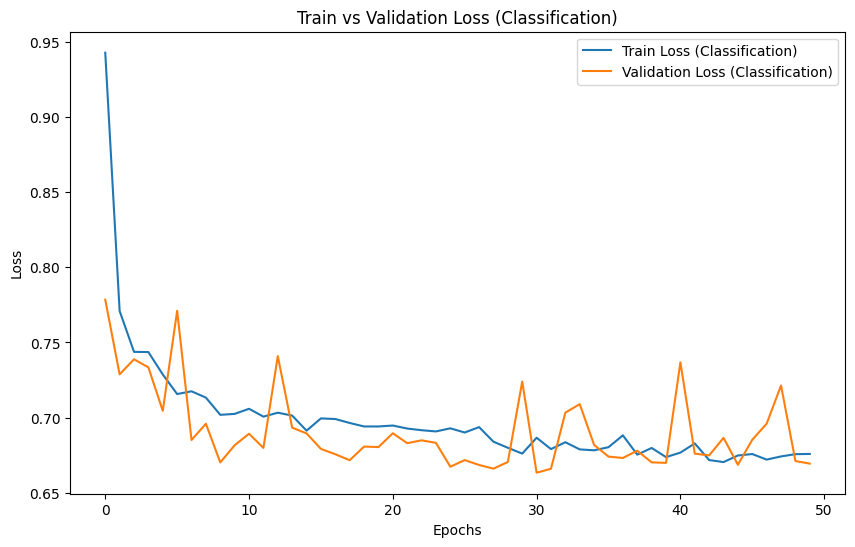

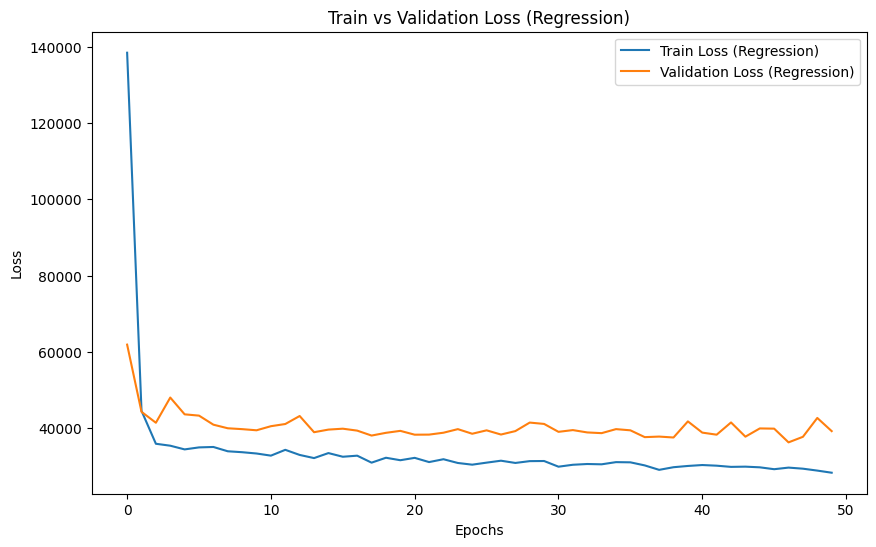

(MultiModel(
   (l1): Linear(in_features=10, out_features=256, bias=True)
   (n1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d1): Dropout(p=0.194, inplace=False)
   (l2): Linear(in_features=256, out_features=128, bias=True)
   (n2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d2): Dropout(p=0.194, inplace=False)
   (l3): Linear(in_features=128, out_features=64, bias=True)
   (n3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d3): Dropout(p=0.194, inplace=False)
   (l4): Linear(in_features=64, out_features=5, bias=True)
 ),
 MultiModel(
   (l1): Linear(in_features=10, out_features=256, bias=True)
   (n1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (d1): Dropout(p=0.194, inplace=False)
   (l2): Linear(in_features=256, out_features=128, bias=True)
   (n2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [ ]:
# Define models with optimal hyperparameters
model_clas = MultiModel(X_train.shape[1], 5)
model_reg = MultiModel(X_train.shape[1], 1)

# Use the best dropout rate
model_clas.d1.p = 0.194
model_clas.d2.p = 0.194
model_clas.d3.p = 0.194

model_reg.d1.p = 0.194
model_reg.d2.p = 0.194
model_reg.d3.p = 0.194

# Optimizers with best learning rates
optimizer_clas = torch.optim.Adam(model_clas.parameters(), lr=0.0025)
optimizer_reg = torch.optim.Adam(model_reg.parameters(), lr=0.00998)

train_loader=DataLoader(preparingDataset(X_train_tensor,Y2_train_tensor,Y1_train_tensor),batch_size=128,shuffle=True)
val_loader=DataLoader(preparingDataset(X_test_tensor,Y2_test_tensor,Y1_test_tensor),batch_size=128,shuffle=True)
train_and_evaluate(
    model_clas=model_clas,
    model_reg=model_reg,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer_clas=optimizer_clas,
    optimizer_reg=optimizer_reg,
    num_epochs=50,
    patience=5
)

In [ ]:
torch.save(model_clas.state_dict(), "best_model_classification.pth")
torch.save(model_reg.state_dict(), "best_model_regression.pth")


# Step 11:- Final result

In [ ]:
Y1_pred=model_reg(X_test_tensor) #output also in tensor
Y2_pred=model_clas(X_test_tensor) #it will give us probability so we need to get max prob. class by using argmax(axis=1) function
accuracy=accuracy_score(Y2_test,Y2_pred.detach().numpy().argmax(axis=1)) #need to convert in numpy array for using sklearn.metrics , 
f1Score=f1_score(Y2_test,Y2_pred.detach().numpy().argmax(axis=1),average='weighted') #avg=weigh for multiclass problem 
r2Score=r2_score(Y1_test,Y1_pred.detach().numpy())
mean_absolute_errors=mean_absolute_error(Y1_test,Y1_pred.detach().numpy())
print("Final Results:")
print(f"Regression - MAE: {mean_absolute_errors}, R²: {r2Score}")
print(f"Classification - Accuracy: {accuracy}, F1-Score: {f1Score}")

Final Results:
Regression - MAE: 73.35211896723199, R²: 0.6257879794386587
Classification - Accuracy: 0.7170257488176563, F1-Score: 0.7173830052123007
